# **Website Performance Analysis**

In [45]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Data Cleaning-- Heading**

In [46]:
Dataset=pd.read_csv("Website_Performance_Dataset.csv")
Dataset.columns=Dataset.iloc[0]    # select the first row of the DataFrame
Dataset.drop(index=0).reset_index(drop=True)
Dataset.columns=["channel_Group","Date_Hour","Users","Sessions","Engaged Session","Engagement_Time_Per_Session","Engaged_Session_Per_User","Events_per_session","Engagement_rate","Event_Count"]
Dataset=Dataset.drop(index=0)
Dataset.head(5)

,channel_Group,Date_Hour,Users,Sessions,Engaged Session,Engagement_Time_Per_Session,Engaged_Session_Per_User,Events_per_session,Engagement_rate,Event_Count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
5,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


**Data Cleaning--Data Type**

In [47]:

Dataset['Date_Hour'] = pd.to_datetime(Dataset['Date_Hour'], format="%Y%m%d%H", errors='coerce')
Dataset['Hour'] = Dataset['Date_Hour'].dt.hour
Dataset['Users']=Dataset['Users'].astype(int)
Dataset['Sessions']=Dataset['Sessions'].astype(int)
Dataset['Engaged Session']=Dataset['Engaged Session'].astype(int)
Dataset['Engagement_Time_Per_Session'] = pd.to_numeric(Dataset['Engagement_Time_Per_Session'], errors='coerce')
Dataset['Engaged_Session_Per_User']=pd.to_numeric(Dataset['Engaged_Session_Per_User'],errors='coerce')
Dataset['Events_per_session']=pd.to_numeric(Dataset['Events_per_session'],errors='coerce')
Dataset['Engagement_rate']=pd.to_numeric(Dataset['Engagement_rate'],errors='coerce')
Dataset['Event_Count']=pd.to_numeric(Dataset['Event_Count'],errors='coerce')
Dataset.dtypes


channel_Group                          object
Date_Hour                      datetime64[ns]
Users                                   int32
Sessions                                int32
Engaged Session                         int32
Engagement_Time_Per_Session           float64
Engaged_Session_Per_User              float64
Events_per_session                    float64
Engagement_rate                       float64
Event_Count                             int64
Hour                                    int32
dtype: object

In [48]:
Dataset.head(5)

,channel_Group,Date_Hour,Users,Sessions,Engaged Session,Engagement_Time_Per_Session,Engaged_Session_Per_User,Events_per_session,Engagement_rate,Event_Count,Hour
1,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
2,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
3,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
4,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
5,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


# **Find Important Insights**

**1.Which Marketing Channel brought the highest number of users to the website, and how can we use this insight to imporve traffic from other sources ?**

C:\Users\LAVI TARAR\AppData\Local\Temp\ipykernel_19908\1117261528.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Dataset,x='channel_Group',y='Users',estimator=np.sum,palette='viridis',fill=True,errwidth=2)
C:\Users\LAVI TARAR\AppData\Local\Temp\ipykernel_19908\1117261528.py:3: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 2}` instead.

  sns.barplot(data=Dataset,x='channel_Group',y='Users',estimator=np.sum,palette='viridis',fill=True,errwidth=2)


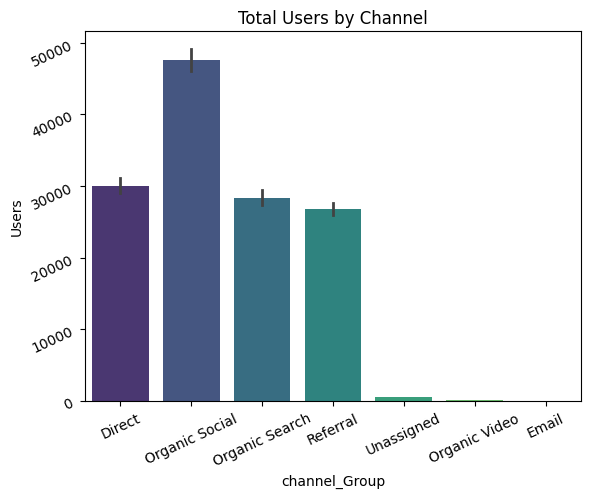

In [49]:
# Total User By Channel
plt.Figure(figsize=(6,4))
sns.barplot(data=Dataset,x='channel_Group',y='Users',estimator=np.sum,palette='viridis',fill=True,errwidth=2)
plt.title("Total Users by Channel",)
plt.xticks(rotation=25)
plt.yticks(rotation=25)
plt.show()

**2.Which Channel has the highest avergae engagemnet time , and what does that tell us abnout user behivour and content effictiveness?**

C:\Users\LAVI TARAR\AppData\Local\Temp\ipykernel_19908\643393191.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Dataset,x='channel_Group',y='Engagement_Time_Per_Session',palette='magma',estimator=np.mean)


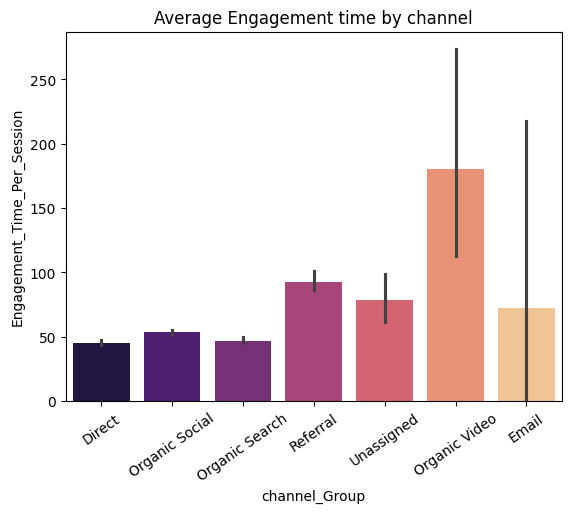

In [50]:
plt.Figure(figsize=(6,5))
sns.barplot(data=Dataset,x='channel_Group',y='Engagement_Time_Per_Session',palette='magma',estimator=np.mean)
plt.title('Average Engagement time by channel')
plt.xticks(rotation=35)
plt.yticks(rotation=0)
plt.show()

**3.How does Engagement rate vary across different traffic Channels?**



C:\Users\LAVI TARAR\AppData\Local\Temp\ipykernel_19908\2513809905.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=Dataset,x='channel_Group',y='Engagement_rate',palette='colorblind')


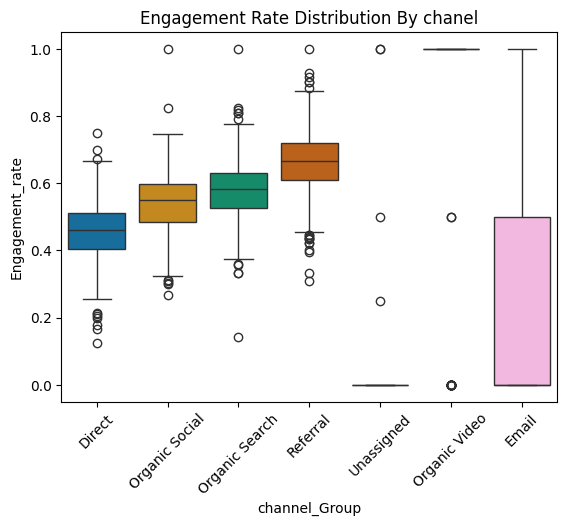

In [51]:
plt.Figure(figsize=(6,5))
sns.boxplot(data=Dataset,x='channel_Group',y='Engagement_rate',palette='colorblind')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.title("Engagement Rate Distribution By chanel")
plt.show()

**4. Which Channels are driving more engaged sessions compared to non-engaged ones, and what strategies can imporve engagement in underperforming channels ?**


In [52]:
session_df=Dataset.groupby('channel_Group')[['Sessions','Engaged Session']].sum().reset_index()
session_df['Non_Engaged']=session_df['Sessions']- session_df['Engaged Session']
session_df_melted = session_df.melt(
    id_vars='channel_Group',
    value_vars=['Engaged Session', 'Non_Engaged'],
    var_name='Session_Type',
    value_name='Count'
)

plt.Figure(figsize=(6,5))
sns.barplot(data=session_df_melted,x='channel_Group',y='value',hue='variable')
plt.title("Engaged Vs Non-Engaged Sessions")
plt.xticks(rotation=45)
plt.show()


ValueError: Could not interpret value `value` for `y`. An entry with this name does not appear in `data`.

**5.At What hours of the day does eaach channel drive the most traffic ?**

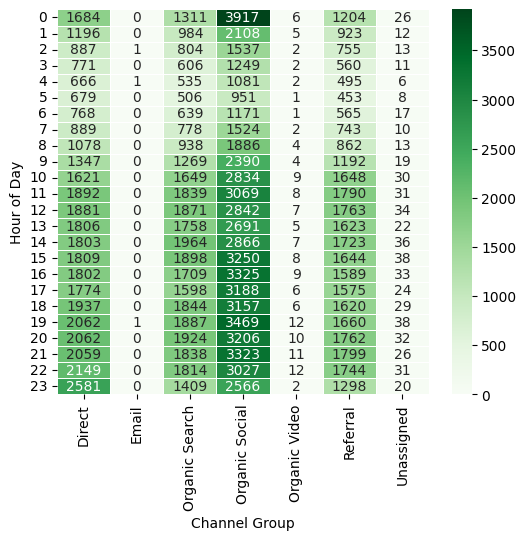

In [ ]:
heatmap_data=Dataset.groupby(['Hour','channel_Group'])['Sessions'].sum().unstack().fillna(0)
#unstack()= function in Pandas is used to pivot a level of the row index (in a multi-index DataFrame) 
# into columns, effectively converting long (stacked) data into wide format.

plt.figure(figsize=(6,5))
sns.heatmap(heatmap_data,linewidths=.7,annot=True,fmt='.0f',cmap='Greens')
#Annot : Add numeric value Annnotation inside each cell.
#Fmt  Format of Annotation.
#Cmp : stands for color map fill cell based on their values.

plt.xlabel('Channel Group')
plt.ylabel('Hour of Day')
plt.show()
